In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
transform =  transforms.ToTensor()

In [3]:
train_data = datasets.CIFAR10( root = r"C:\Users\M1050355", download=True, train= True, transform= transform)

Files already downloaded and verified


In [4]:
test_data = datasets.CIFAR10( root = r"C:\Users\M1050355", download=True, train= False, transform= transform)

Files already downloaded and verified


In [ ]:
test_data

In [5]:
torch.manual_seed(101)
train_loader = DataLoader(train_data, batch_size= 100, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 100, shuffle=True)

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [7]:
for images,labels in train_loader:
    break

In [ ]:
images[0]

In [12]:
images[0].shape

torch.Size([3, 32, 32])

In [ ]:
labels[0]

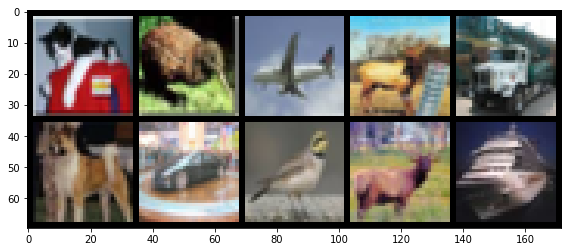

In [8]:
im = make_grid(images[0:10], nrow= 5)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0))) 

In [9]:
labels[0:10]

tensor([3, 2, 0, 4, 9, 5, 1, 2, 4, 8])

In [10]:
images.shape

torch.Size([100, 3, 32, 32])

# Stride in filter

<img src ='Stridepause.JPG' >

<img src ='stride1.gif' >

<img src ='img1.gif' >

<img src ='Convolution layer.gif' >

## Padding in CNN

<img src ='img2.gif' >

## Pooling - To downsample

<img src ='max pooling.png' >

In [ ]:
# Types of pooling - Max pooling, avg pooling

In [ ]:
# Types of filter

<img src ='CNNlayers.png' >

In [29]:
class convCIFAR(nn.Module):
    def __init__ (self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3,5,5,1)
        self.conv2 = nn.Conv2d(5,20,3,1)
        
        self.fc1 = nn.Linear(6*6*20,120)
        self.fc2 = nn.Linear(120,80)
        self.fc3 = nn.Linear(80,10)
        
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2,2)
        
        x = x.view(-1,6*6*20)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x),dim = 1)
        return(x)

In [13]:
for i , (X_train,y_train) in enumerate(train_data):
    break


In [14]:
x = X_train.view(-1,3,32,32)

In [15]:
x.shape

torch.Size([1, 3, 32, 32])

In [ ]:
nn.Conv2d(3,5,3,1)

In [34]:
conv1 = nn.Conv2d(3,8,5,1)
conv2 = nn.Conv2d(8,20,3,1)

In [35]:
X  = conv1(x)

In [36]:
X.shape

torch.Size([1, 5, 28, 28])

In [37]:
X = F.max_pool2d(X,2,2)

In [38]:
X.shape

torch.Size([1, 5, 14, 14])

In [39]:
X  = F.relu(conv2(X))

In [40]:
X.shape

torch.Size([1, 20, 12, 12])

In [41]:
X = F.max_pool2d(X,2,2)

In [42]:
X.shape

torch.Size([1, 20, 6, 6])

In [ ]:
# CNN using a set of labelled images: this allows to optimize the weights of its convolutional filters, 
# hence learning the filters shape themselsves, to minimize the error.
# We provide the learning algorithm with an overcomplete set of learnable filters, 
# and the algorithm learns the filters it needs to minimize the objective function.

In [30]:
model = convCIFAR()

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [32]:
epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%100 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/50000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

epoch:  0  batch:  100 [  1000/50000]  loss: 2.05438089  accuracy:  20.440%
epoch:  0  batch:  200 [  2000/50000]  loss: 1.86302173  accuracy:  24.200%
epoch:  0  batch:  300 [  3000/50000]  loss: 1.93187118  accuracy:  26.467%
epoch:  0  batch:  400 [  4000/50000]  loss: 1.84864581  accuracy:  28.672%
epoch:  0  batch:  500 [  5000/50000]  loss: 1.62745166  accuracy:  30.950%
epoch:  1  batch:  100 [  1000/50000]  loss: 1.63752925  accuracy:  42.040%
epoch:  1  batch:  200 [  2000/50000]  loss: 1.53526366  accuracy:  42.960%
epoch:  1  batch:  300 [  3000/50000]  loss: 1.50691926  accuracy:  43.770%
epoch:  1  batch:  400 [  4000/50000]  loss: 1.48792386  accuracy:  44.333%
epoch:  1  batch:  500 [  5000/50000]  loss: 1.37200165  accuracy:  44.700%
epoch:  2  batch:  100 [  1000/50000]  loss: 1.35001588  accuracy:  48.390%
epoch:  2  batch:  200 [  2000/50000]  loss: 1.35035396  accuracy:  48.105%
epoch:  2  batch:  300 [  3000/50000]  loss: 1.31625295  accuracy:  47.840%
epoch:  2  b

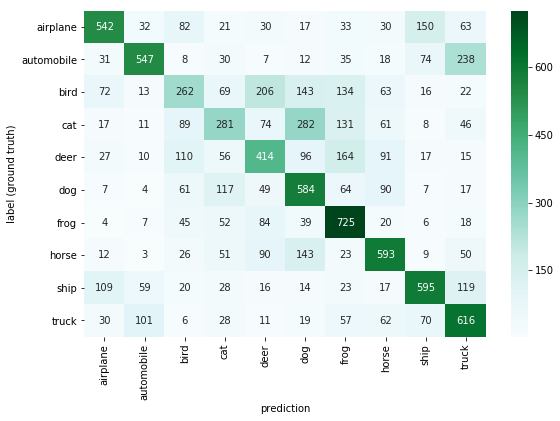

In [33]:
import numpy as np
import pandas as pd
import seaborn as sn  # for heatmaps
from sklearn.metrics import confusion_matrix
# Create a loader for the entire the test set
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

arr = confusion_matrix(y_test.view(-1), predicted.view(-1))
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (9,6))
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show();